# Guided Project: Popular Data Science Questions 

## Table of Contents 
1. [Introduction](#introduction)
2. [Executive Summary](#exec-summary)
3. [Stack Exchange Data Explorer](#sede)
4. [Getting the Data](#getting-data)
5. [Import the dependencies](#import-the-dependencies)
6. [Exploring the Data](#exploring-data)
7. [Cleaning the Data](#cleaning-data)
8. [Most Used and Most Viewed](#most)
9. [Hype or not: Deep Learning](#hype-or-not)
10. [Observations and Final Recommendation](#obs-recomm)

## Introduction <a name="introduction"></a>

This is a project I completed based on a guide called "Popular Data Science Questions" on the Dataquest learning platform. The focus of this project was to learn new skills related to data exploration, preparation and analysis, using the available public data set based on the StackExchange platform. It also focussed on communicating the results of a business analysis. 

The implementation is written in Python, using pandas, numby and matplotlib libraries, and is shown in Jupyter Notebooks.

To run these notebooks in your own local dev environent:
1. Download the [StackExchange.ipynb](https://downgit.github.io/#/home?url=https://github.com/skillspark/learn-data-analysis/blob/main/StackExchange.ipynb) file in this repository and place it in  "<your_dev_folder>" folder
2. Download the data set [questions.csv](https://downgit.github.io/#/home?url=https://github.com/skillspark/learn-data-analysis/blob/main/data/stack_exchange/questions.csv) file in this repository and place it in "<your_dev_folder>/data/stack_exchange" folder

### Briefing

In this scenario, you're working for a company that creates data science content, be it books, online articles, videos or interactive text-based platforms like Dataquest.

You're tasked with figuring out what is best content to write about. Because you took this course, you know that given the lack of instructions there's some leeway in what "best" means here.

Since you're passionate about helping people learn, you decide to scour the internet in search for the answer to the question "What is it that people want to learn about in data science?" (as opposed to determining the most profitable content, for instance).

Thinking back to your experience when you first started learning programming, it occurs to you that if you wanted to figure out what programming content to write, you could consult Stack Overflow (a question and answer website about programming) and see what kind of content is more popular.

You decide to investigate Stack Overflow a little more and find out that it is part of a question and answer website network called Stack Exchange.


### Executive Summary <a name="exec-summary"></a>

The project required our team to determine what the best data science content is to create. We decided to investigate **Stack Exchange**, which hosts sites on a multitude of fields and subjects, including mathematics, physics, philosophy, and data science! Here's a sample of the most popular sites:

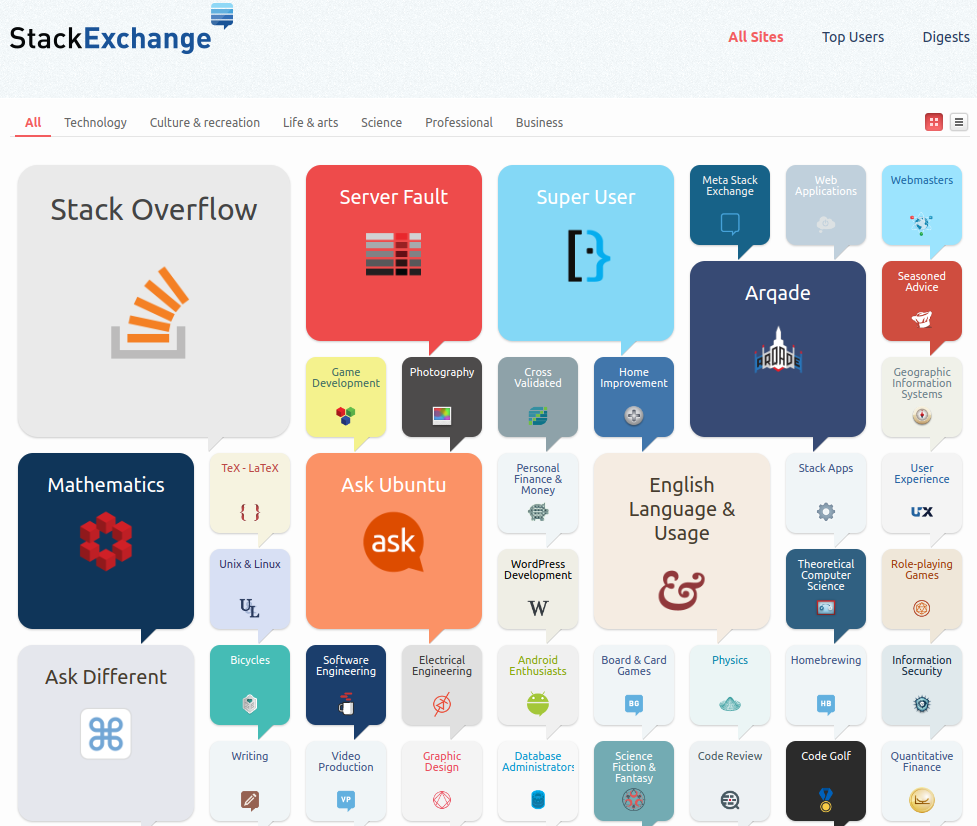

Stack Exchange is a renowned online platform fostering knowledge exchange via a voting-based system. This system enhances content quality by allowing users to upvote accurate information and downvote inaccuracies, ensuring credibility. This approach rewards contributors with reputation points, promoting a culture of expertise.

**Data Science Stack Exchange (DSSE)** serves as a valuable tool to identify popular topics. Analyzing question volumes, votes, and discussions reveals emerging trends**. This empowers data professionals to stay updated on evolving technologies and methodologies. 

After exploring the DSSE site, we came to the following conclusions:
1. The site subsdivides into  "tags" which should allow us to segment the content. 
2. The type of information available in each post is view count, favorite count, no. of votes (up and down), the original poster, related posts, date of post, comments to each post, and more. View count could prove to be particularly useful.

In order to do the analysis, we used the Stack Exchange Data Explorer (SEDE) to gather the data. We then explored and cleaned the data, analysed what kind of questions are most posted and viewed, and ran a proof of concept on whether the topic of deep learning is just a fad. 

Our main finding was surprising, in that peak interest of deep learning was 5% of the total data science questions, which was reached in 2018, and has started to decline. However, the exercise proved that we should continue to monitor to popularity of certain topics. 

Our proposal would be to dedicate a resource to the continuous monitoring a data science questions' popularity. The estimated budget required is estimated at $ 100'000 per year.


## Stack Exchange Data Explorer <a name="sede"></a>

### What was learned?

Stack Exchange provides a public database for each of its websites: the [Stack Exchange Data Explorer (SEDE)](https://data.stackexchange.com/datascience/query/new)

SEDE uses Transact-SQL (Microsoft's SQL). For instance, the query below selects the top 10 results from a query.
```sql
SELECT TOP 10 *
FROM tags
ORDER BY Count DESC;
```
More resources are availablie on SEDE's [help section](https://data.stackexchange.com/help) and [tutorial](https://data.stackexchange.com/tutorial).

The following tables look promising to find most popular content:
1. `posts` shows posts and the number of views per post
2. `comments` shows all comments relates to a post, and the score give to each comments
3. `users` shows the contributors to a post, the reputation might be interesting for our purposes
4. `tags` shows the post tags and also the total count of each tag 

## Getting the Data <a name="getting-data"></a>

### What was learned?

The posts table has a lot of columns. We'll be focusing our attention on those that seem relevant towards our goal:

- Id: An identification number for the post.
- PostTypeId: An identification number for the type of post.
- CreationDate: The date and time of creation of the post.
- Score: The post's score.
- ViewCount: How many times the post was viewed.
- Tags: What tags were used.
- AnswerCount: How many answers the question got (only applicable to question posts).
- FavoriteCount: How many times the question was favored (only applicable to question posts).



We thought it necessary to use `Tags` to segement the posts and `ViewCount` to determine popularity.

Regarding post types, there are eight different types. 

``` sql
SELECT pt.Name, COUNT(*) as NrOfPosts
FROM posts p
join PostTypes pt on p.PostTypeId = pt.Id
GROUP BY pt.Name
ORDER BY NrOfPosts DESC;
```

| Id |         Name         | NrOfPosts |
|----|---------------------|-----------|
| 2  |       Answer        |   40462   |
| 1  |      Question       |   36385   |
| 4  |  TagWikiExcerpt  |    331    |
| 5  |       TagWiki       |    331    |
| 6  | ModeratorNomination |    14     |
| 7  |  WikiPlaceholder  |     1     |



Due to their low volume, anything that isn't questions or answers is mostly inconsequential. Even if it happens to be the case that such kind of posts is immensely popular, they would just be outliers and not relevant to us. We'll then just focus on the questions.

Here's a query with the required columnns, for questions only.
```sql 
SELECT Id,
PostTypeId,
CreationDate,
Score,
ViewCount,
Tags,
AnswerCount,
FavoriteCount
FROM posts
WHERE PostTypeID = 1 // only Questions
```


## Import the dependencies <a name="import-the-dependencies"></a>
We need to use the pandas, numpy and matplotlib.pyplot libraries within this notebook.

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exploring the Data <a name="exploring-data"></a>

The result of the query was stored in a file called questions.csv. 

In [244]:
# read questions file into dataframe
qs = pd.read_csv("data/stack_exchange/questions.csv")

Here is a sample of some rows of the data we got:

|   Id   | PostTypeId |     CreationDate      | Score | ViewCount |                   Tags                                                     | AnswerCount | FavoriteCount |
|:------:|:----------:|:---------------------:|:-----:|:---------:|:--------------------------------------------------------------------------:|:-----------:|:-------------:|
| 122443 |      1     | 2023-06-27 22:56:18   |   0   |     12    | &lt;sequence&gt;&lt;google&gt;&lt;ngrams&gt;&lt;bag-of-words&gt;            |      1      |               |
| 122450 |      1     | 2023-06-28 06:42:32   |   0   |     12    | &lt;regression&gt;&lt;prediction&gt;&lt;overfitting&gt;&lt;huggingface&gt; |     0     |               |
| 122452 |      1     | 2023-06-28 11:05:10   |   0   |     24    | &lt;predictive-modeling&gt;&lt;statistics&gt;&lt;survival-analysis&gt;     |     0     |               |
| 122453 |      1     | 2023-06-28 14:36:56   |   0   |     26    | &lt;python&gt;&lt;deep-learning&gt;&lt;keras&gt;                            |      1     |               |
| 122455 |      1     | 2023-06-28 15:30:06   |   0   |     20    | &lt;python&gt;&lt;pandas&gt;                                              |      1     |               |

We explored the data in more detail. Some notable observations: 
- `FavouriteCount` has missing values 
- Some columns' data types can be improved for analysis purposes
- `Tags` is a list of values

Details follow below:

In [245]:
# count missing values in each column
qs.isna().sum()

Id                   0
PostTypeId           0
CreationDate         0
Score                0
ViewCount            0
Tags                 0
AnswerCount          0
FavoriteCount    35800
dtype: int64

It appears that there are 35'800 missing values in column `FavoriteCount`. The most sense would be to replace the missing values with 0's as this is a number column.

In [246]:
# list types of each column
qs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36385 entries, 0 to 36384
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             36385 non-null  int64  
 1   PostTypeId     36385 non-null  int64  
 2   CreationDate   36385 non-null  object 
 3   Score          36385 non-null  int64  
 4   ViewCount      36385 non-null  int64  
 5   Tags           36385 non-null  object 
 6   AnswerCount    36385 non-null  int64  
 7   FavoriteCount  585 non-null    float64
dtypes: float64(1), int64(5), object(2)
memory usage: 2.2+ MB


From the above list of columns, the `CreationDate` column can be changed to type `datetime`. Also, the Count columns could be changed to type `int64`

## Cleaning the Data <a name="cleaning-data"></a>

At the end of the task, the types of the columns should be as follows.

|    Column       |       Data Type       |
|-----------------|-----------------------|
|       Id         |       int64           |
|  CreationDate   | datetime64[ns]       |
|      Score      |       int64           |
|   ViewCount     |       int64           |
|      Tags       |       object          |
|  AnswerCount    |       int64           |
| FavoriteCount  |       int64           |


The values in the Tags column are strings that look like this:

*"\<machine-learning\>\<regression\>\<linear-regression\>\<regularization\>"*

should be transformed into something more suitable to use typical string methods, like this: 

*"machine-learning,regression,linear-regression,regularization"*

We can then split on "," to obtain a list.

In [247]:
# replace missing int values with 0 using np.nan to represent missing values
qs = qs.replace(np.nan, 0)

# set the types of each column as suggested above
qs['CreationDate'] = qs['CreationDate'].astype('datetime64[s]')
qs['ViewCount'] = qs['ViewCount'].astype('int64')
qs['FavoriteCount']= qs['FavoriteCount'].astype('int64')
qs['AnswerCount'] = qs['AnswerCount'].astype('int64')

# clean the Tags column and assign it back as a list to qs["Tags"]
qs['Tags'] = qs['Tags'].str.replace('><', ',').str.strip('<>').str.split(',')

#### Verify the output
1. Missing values from Counts columns replaced with 0s (not `Tags`)

In [248]:
# count missing values in each column
qs.isna().sum()

Id               0
PostTypeId       0
CreationDate     0
Score            0
ViewCount        0
Tags             0
AnswerCount      0
FavoriteCount    0
dtype: int64

2. Data Type set: Dates as `datetime`, Counts as `int64`

In [249]:
# list types of each column
qs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36385 entries, 0 to 36384
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype        
---  ------         --------------  -----        
 0   Id             36385 non-null  int64        
 1   PostTypeId     36385 non-null  int64        
 2   CreationDate   36385 non-null  datetime64[s]
 3   Score          36385 non-null  int64        
 4   ViewCount      36385 non-null  int64        
 5   Tags           36385 non-null  object       
 6   AnswerCount    36385 non-null  int64        
 7   FavoriteCount  36385 non-null  int64        
dtypes: datetime64[s](1), int64(6), object(1)
memory usage: 2.2+ MB


3. `Tags` column as comma-separated list

In [250]:
# show preview of values in "Tags", now split into comma-separated lists 
# (with empty list if no value)
qs['Tags'].head()

0             [sequence, google, ngrams, bag-of-words]
1    [regression, prediction, overfitting, huggingf...
2    [predictive-modeling, statistics, survival-ana...
3                       [python, deep-learning, keras]
4                                     [python, pandas]
Name: Tags, dtype: object

## Most Used and Most Viewed <a name="most"></a>

We now focus on determining the most popular tags, which will determine which content we create. We'll do so by considering two different popularity proxies: for each tag we'll count how many times the tag was used, and how many times a question with that tag was viewed.

For now we'll limit the focus of our research to counts and views, although we could look at other metrics.

Firstly, we need to separate the tags used on each question. Then we can count the number of questions which used the tag, and count the number of views on the question using that tag.

In [251]:
# explode each post's 'Tags' to separate rows
qs = qs.explode('Tags', ignore_index=True)
print(qs)

            Id  PostTypeId        CreationDate  Score  ViewCount  \
0       122443           1 2023-06-27 22:56:18      0         12   
1       122443           1 2023-06-27 22:56:18      0         12   
2       122443           1 2023-06-27 22:56:18      0         12   
3       122443           1 2023-06-27 22:56:18      0         12   
4       122450           1 2023-06-28 06:42:32      0         12   
...        ...         ...                 ...    ...        ...   
111641   34413           1 2018-07-13 09:27:57     -1        394   
111642   34413           1 2018-07-13 09:27:57     -1        394   
111643   34413           1 2018-07-13 09:27:57     -1        394   
111644   34413           1 2018-07-13 09:27:57     -1        394   
111645   34413           1 2018-07-13 09:27:57     -1        394   

                    Tags  AnswerCount  FavoriteCount  
0               sequence            1              0  
1                 google            1              0  
2                 

In [252]:
# group by 'Tags', then aggregate to get the the count of Tags and sum of ViewCount and put this into a new stats dataframe with appropriate column names
qs_stats = qs.groupby('Tags').agg({'Tags': 'count', 'ViewCount': 'sum'}).rename(columns={'Tags': 'UsedCount', 'ViewCount': 'ViewedCount'})

# reset index to get the 'Tags' as a column
qs_stats.reset_index(inplace=True)

# rename 'Tags' column to 'Tag'
qs_stats.rename(columns={'Tags':'Tag'},inplace=True)

print(qs_stats)

                     Tag  UsedCount  ViewedCount
0                   .net         14         7252
1    3d-object-detection          6         1016
2      3d-reconstruction         13         4682
3                ab-test         53        42289
4               accuracy        397       860455
..                   ...        ...          ...
691   xgboost-classifier          4          117
692      xgboost-predict          2           45
693                 yolo        124       126706
694               yolov5          3           44
695   zero-shot-learning          2         1044

[696 rows x 3 columns]


We now have the all of the tags with the number of times they appear in all posts, and the number of times these posts have been viewed. 
Preview the top 20 ranked by *usage count*:

In [253]:
qs_stats_top20_used = qs_stats.sort_values('UsedCount', ascending=False).head(20)
qs_stats_top20_used

,Tag,UsedCount,ViewedCount
369,machine-learning,11235,22008768
516,python,6627,22547905
149,deep-learning,4828,10770098
425,neural-network,4345,10817831
85,classification,3220,4969112
331,keras,2736,7904612
430,nlp,2652,3610574
562,scikit-learn,2287,8801946
629,tensorflow,2207,4432300
647,time-series,1862,2220363


We can also look at the top 20 ranked by *viewed count*:

In [254]:
qs_stats_top20_viewed = qs_stats.sort_values('ViewedCount', ascending=False).head(20)
qs_stats_top20_viewed

,Tag,UsedCount,ViewedCount
516,python,6627,22547905
369,machine-learning,11235,22008768
425,neural-network,4345,10817831
149,deep-learning,4828,10770098
464,pandas,1330,9247876
562,scikit-learn,2287,8801946
331,keras,2736,7904612
85,classification,3220,4969112
629,tensorflow,2207,4432300
524,r,1482,3942180


To visualize the top 20 tags used (and their view counts), provide 2 separate horizontal bar charts. Separate them because these 2 counts are several orders of magnitude apart.

Text(0.5, 0.98, 'StackExchange Tag Statistics: Top 20 Used Count and their Viewed Count')

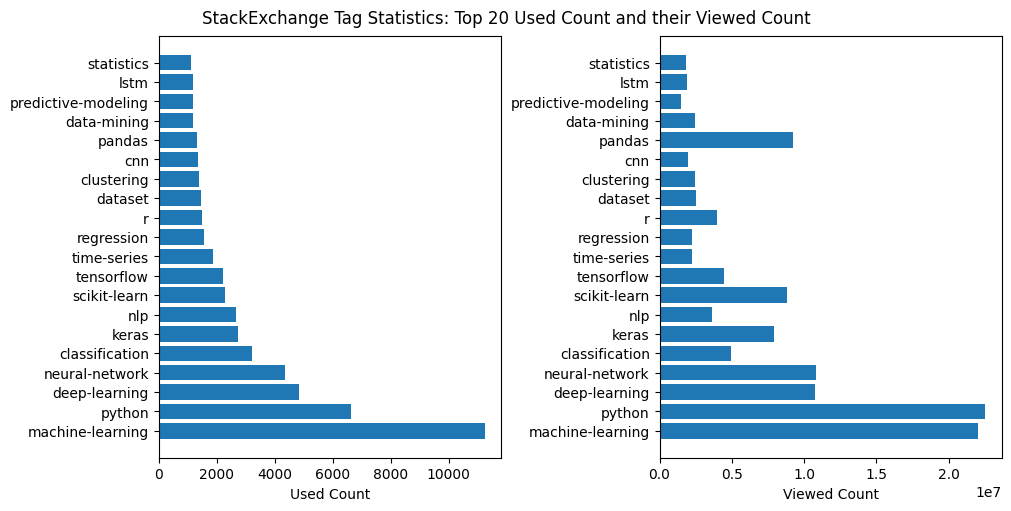

In [255]:
chart_data = qs_stats_top20_used

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5), layout='constrained')
ax1.barh('Tag', 'UsedCount', data=chart_data)
ax1.set_xlabel('Used Count')
ax2.barh('Tag', 'ViewedCount', data=chart_data)
ax2.set_xlabel('Viewed Count')
plt.suptitle('StackExchange Tag Statistics: Top 20 Used Count and their Viewed Count')

One interesting observation is that most of the tags in the top 20 ranked by used usage also appear to be highly viewed. Let's take the full dataset and try to confirm this using a scatter plot:

Text(0.5, 1.0, 'StackExchange Tag Statistics: Used Count vs. Viewed Count for all Tags')

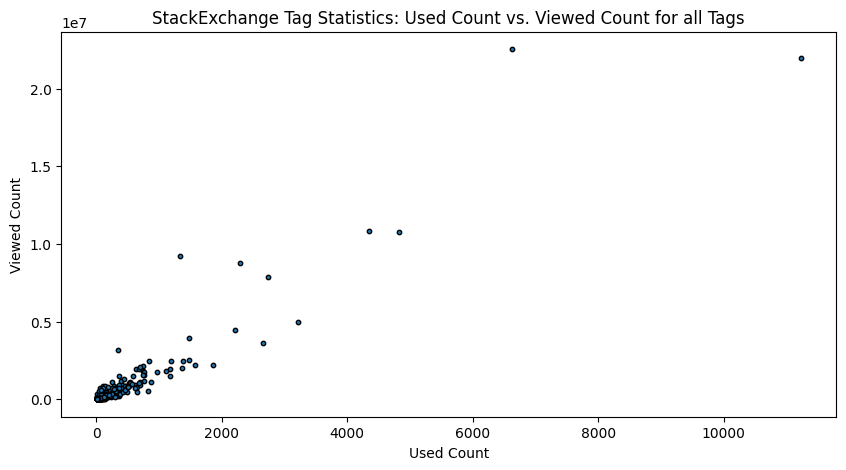

In [256]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(qs_stats['UsedCount'], qs_stats['ViewedCount'], edgecolors='k', s=10)
ax.set_xlabel('Used Count')
ax.set_ylabel('Viewed Count')
ax.set_title('StackExchange Tag Statistics: Used Count vs. Viewed Count for all Tags')


### Conclusion
It appears that some of  the top used tags are *machine-learning, deep-learning, python, neural-networks, classification, scikit-learn and pandas*. 
Also, there appears to be a strong correlation between the viewed count and the used count of these tags.

## Just a Fad? 


### Hype or not: Deep Learning <a name="hype-or-not"></a>

To address the topic "Is deep learning just a fad", lets address the following questions:
- How many deep learning questions were asked per time period?
- What is the total amount of questions asked per time period?
- How many deep learning questions there are relative to the total amount of questions per time period?

Assumptions:
- To classify a question as being on deep learning, it should contain the *deep-learning* tag. 
- We have data from 2014 until the time of writing (2023). Therefore a suitable time period could be yearly. 

The data was previously loaded in the dataframe `qs`, then "exploded" to `qs_exploded` with one row per tag and question. 

First, get only the questions which are tagged with *deep-learning*:

In [257]:
qs['Year'] = qs['CreationDate'].dt.year
qs_deep = qs[qs['Tags']=="deep-learning"]
qs_deep.head()

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount,Year
12,122453,1,2023-06-28 14:36:56,0,26,deep-learning,1,0,2023
33,61358,1,2019-10-07 05:23:59,4,3527,deep-learning,2,0,2019
104,61433,1,2019-10-08 13:40:01,1,310,deep-learning,1,0,2019
167,34431,1,2018-07-13 17:10:35,2,268,deep-learning,2,0,2018
176,34444,1,2018-07-13 20:21:41,29,29207,deep-learning,2,0,2018


Now do a count of the questions, aggregated by year. 

In [258]:
count_qs_deep_by_year = qs_deep.groupby('Year').agg(Count=('Tags', 'size'))
count_qs_deep_by_year

,Count
Year,
2014,8
2015,30
2016,158
2017,422
2018,896
2019,895
2020,842
2021,683
2022,570


Do the same for all questions asked:

In [259]:
count_qs_by_year = qs.groupby('Year').agg(Count=('Tags', 'size'))
count_qs_by_year

,Count
Year,
2014,1407
2015,2905
2016,5964
2017,8410
2018,16347
2019,20461
2020,19941
2021,14972
2022,13189


The previous two steps resulted in two dataframes: one for count of *deep-learning* questions, and one for count of *all* questions, grouped by year.
Combine the two into one dataframe, and then calculate how many *deep-learning* questions there are relative to all questions.

      CountDeepLearning  CountAll  PercentOfAll
Year                                           
2014                  8      1407         0.57%
2015                 30      2905         1.03%
2016                158      5964         2.65%
2017                422      8410         5.02%
2018                896     16347         5.48%
2019                895     20461         4.37%
2020                842     19941         4.22%
2021                683     14972         4.56%
2022                570     13189         4.32%
2023                324      8050         4.02%


<Axes: xlabel='Year'>

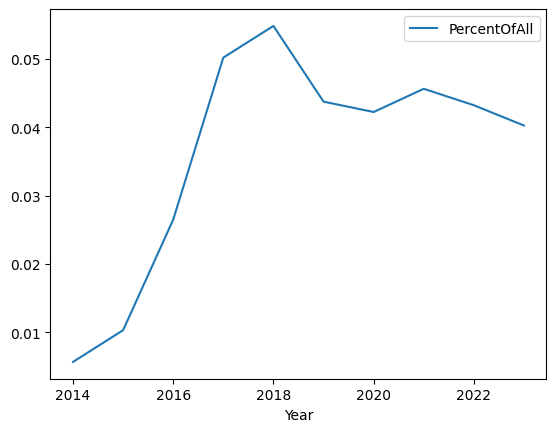

In [260]:
# merged dataframe containing the deep-learning questions and all questions counts by year
qs_deep_vs_all = count_qs_deep_by_year.merge(count_qs_by_year, how='left', left_index=True, right_index=True, suffixes=('DeepLearning', 'All'))

# add a column to show count of deep-learning questions relative to count of all questions by year
qs_deep_vs_all['PercentOfAll'] = qs_deep_vs_all['CountDeepLearning'] / qs_deep_vs_all['CountAll']

# format the new float column as percentage rounded off to two decimal places
pd.options.display.float_format = '{:.2%}'.format

# preview the datframe in numbers
print(qs_deep_vs_all)

# show the percent of all data as a line chart
qs_deep_vs_all.plot.line(y='PercentOfAll')



The point of this is to show the percentage of *deep-learning* questions relative to *all* questions. 

There was a big jump from 2016 to 2017 of 2.65% to 5.02%. We also see that there was a peak at 2018, with a value of 5.48%; since then, the percentage of deep-learning* questions are in a slow decline. 

Its also interesting to note that data science questions overall has been declining steadily since 2020:

<Axes: xlabel='Year'>

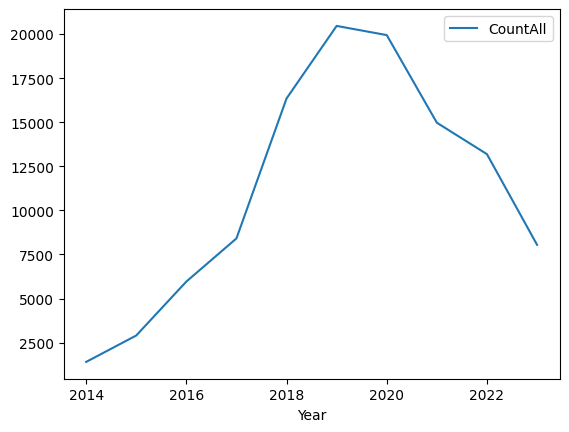

In [261]:
# show the count of all data as a line chart
qs_deep_vs_all.plot.line(y='CountAll')

## Observations and Final Recommendation  <a name="obs-recomm"></a>

The data available on DSSE serves a good purpose for our needs. 
1. Its timely enough: we have up-to-date data extending back to 2014
2. There are not too many data cleansing requirements
3. There are a lot of attributes which could further fulfill our needs


Our team's recommendation:
1. Continue exploring different popular tags on DSSE, and monitor for significant jumps or falls in them. 
2. Employ statistical methods to determine significant relationships between certain combinations of tags.
3. Deep Learning may not be the best topic to create content for at the moment, as it appears the hype has already passed, with usage making up roughly 5% of all data science questions. The team should continue analysing the tags used more recently in questions posted. 